# Estimación del cultivo

## Métricas de las variables

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pathlib import Path
import json
import math

In [25]:
pd.set_option('display.max_rows', None)  # Muestra todas las filas
pd.set_option('display.max_columns', None)  # Muestra todas las columnas
pd.set_option('display.expand_frame_repr', False)  # Evita que pandas colapse el DataFrame en una única línea.

In [44]:
#df = pd.read_csv(r'score/zafras_modelado.csv')
df21_r = pd.read_csv(r'score/zafra21_r.csv')
df22_r = pd.read_csv(r'score/zafra22_r.csv')
df23_r = pd.read_csv(r'score/zafra23_r.csv')
df21_m = pd.read_csv(r'score/zafra21_m.csv')
df22_m = pd.read_csv(r'score/zafra22_m.csv')
df23_m = pd.read_csv(r'score/zafra23_m.csv')
df_r = pd.read_csv(r'score/zafras_r.csv')
df_m = pd.read_csv(r'score/zafras_m.csv')
df21122_2223_r = pd.read_csv(r'score/zafra2122_2223_r.csv')
df21122_2223_m = pd.read_csv(r'score/zafra2122_2223_m.csv')

In [57]:
df21_r['zafra'] = 2021
df21_m['zafra'] = 2021
df22_r['zafra'] = 2022
df22_m['zafra'] = 2022
df23_r['zafra'] = 2023
df23_m['zafra'] = 2023
df_r['tipo'] = 'Real'
df_m['tipo'] = 'Modelado'
df21122_2223_r['tipo'] = 'Real'
df21122_2223_m['tipo'] = 'Modelado'

### 21/22 y 22/23

In [60]:
concat_reales = pd.concat([df21_r, df22_r])
concat_modelados = pd.concat([df21_m, df22_m])
concated_total = pd.concat([df21122_2223_r, df21122_2223_m])

In [65]:
df21122_2223_m.sort_values(by='R2', ascending=False).round(decimals=3)

,Variable,R2,P_values,MSE,Params,RMSE,tipo
4,cire_max,0.613,[3.03150661e-01 1.64837983e-05],2444.538,[10.82399739 27.17313764],49.442,Modelado
8,ndre_max,0.598,[1.03941396e-01 2.43984379e-05],2384.557,[-30.90692776 191.68800955],48.832,Modelado
6,ndre1_max,0.570,[1.57190043e-01 4.87426642e-05],2273.241,[-27.17447987 214.84004942],47.679,Modelado
2,gndvi_max,0.554,[6.99090920e-03 7.10251754e-05],2209.642,[-102.88465694 272.74544449],47.007,Modelado
0,ndvi_max,0.540,[1.67581275e-02 9.74057698e-05],2154.575,[-79.08884991 198.12016446],46.417,Modelado
5,cire_mean,0.523,[3.55021194e-01 1.44514811e-04],2083.548,[11.50305705 38.76124981],45.646,Modelado
9,ndre_mean,0.482,[0.24283068 0.00033696],1922.400,[-26.28970431 240.98502359],43.845,Modelado
3,gndvi_mean,0.466,[0.02333029 0.00045987],1860.125,[-96.40358931 314.99779005],43.129,Modelado
7,ndre1_mean,0.429,[0.4768057 0.0009446],1709.401,[-15.65025815 258.88409396],41.345,Modelado
10,ndmi_mean,0.403,[1.40218378e-08 1.49801276e-03],1607.922,[ 49.51448701 160.37914055],40.099,Modelado


<Figure size 1000x1000 with 0 Axes>

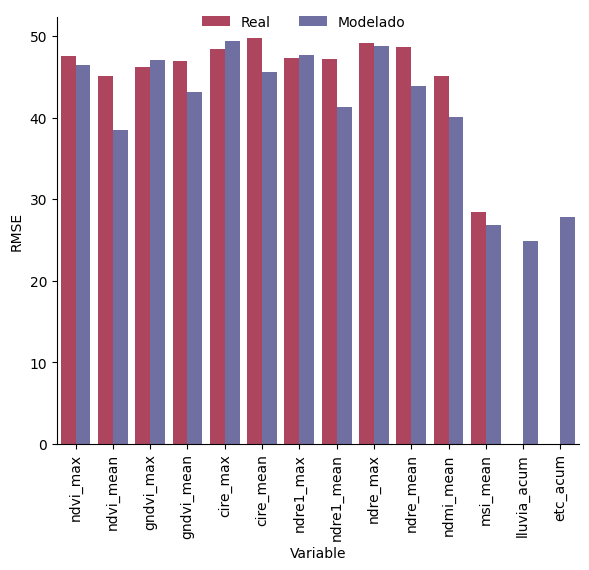

In [64]:
plt.figure(figsize=(10,10))
a = sns.catplot(data=concated_total, x='Variable', y='RMSE', kind='bar', hue='tipo', legend='auto', palette=sns.color_palette(['#BE3455', '#6667AB']))
sns.move_legend(a, loc='upper center', bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)
plt.tight_layout()
plt.xlabel('Variable')
plt.ylabel('RMSE')
plt.xticks(rotation=90)
plt.savefig(r'../../tesis_img/yield_new/zafras2122_2223_rmse_r_vs_m.pdf', dpi=150)
plt.show()

## Modelo de regresion

In [18]:
rl21_r = pd.read_csv(r'predicts/zafra21_r.csv')
rl22_r = pd.read_csv(r'predicts//zafra22_r.csv')
rl23_r = pd.read_csv(r'predicts//zafra23_r.csv')
rl21_m = pd.read_csv(r'predicts//zafra21_m.csv')
rl22_m = pd.read_csv(r'predicts//zafra22_m.csv')
rl23_m = pd.read_csv(r'predicts//zafra23_m.csv')
rl_r = pd.read_csv(r'predicts//zafras_r.csv')
rl_m = pd.read_csv(r'predicts//zafras_m.csv')

<>:7: SyntaxWarning: invalid escape sequence '\c'
<>:7: SyntaxWarning: invalid escape sequence '\c'
C:\Users\vival\AppData\Local\Temp\ipykernel_9728\945724617.py:7: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel('Rendimiento ($ton \cdot ha^{-1}$)')


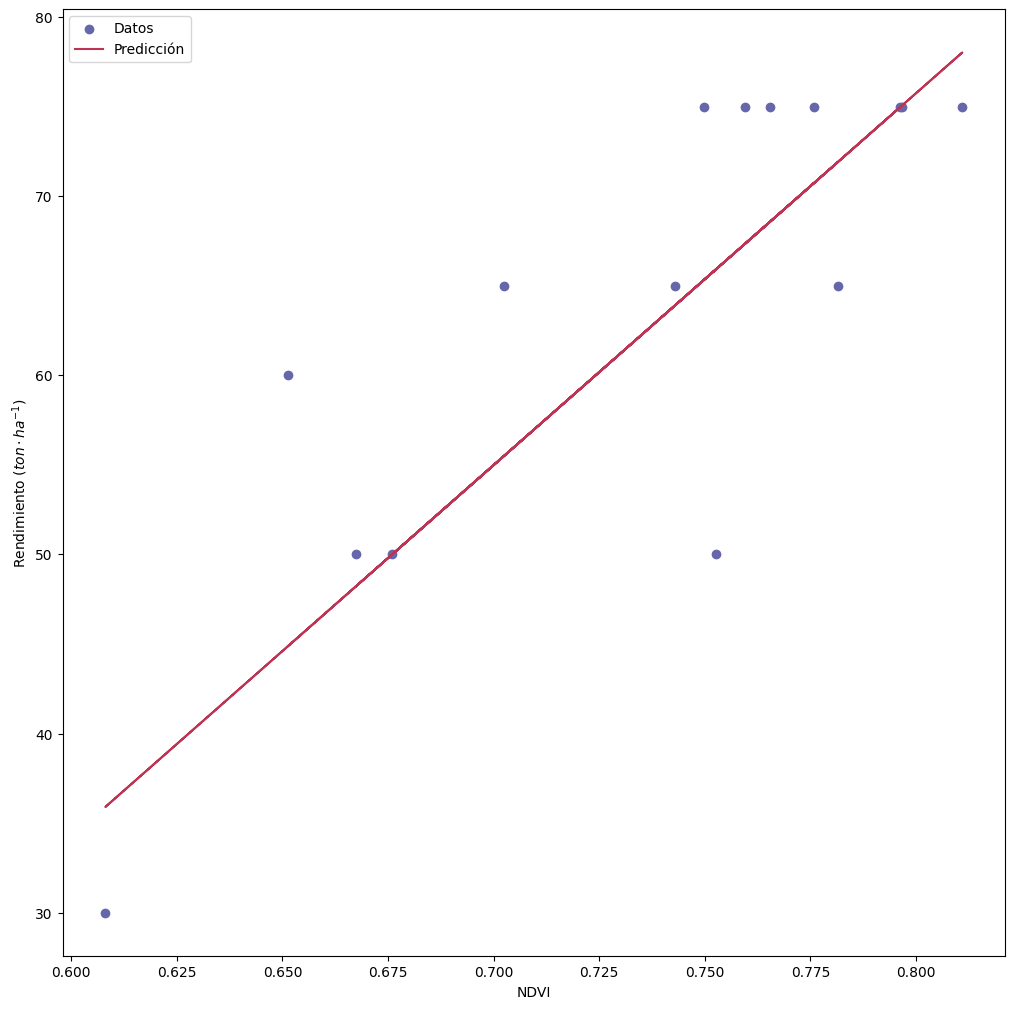

In [22]:
plt.figure(figsize=(10,10))
plt.scatter(rl22_m['ndvi_max'], rl22_m['rendimiento'], color='#6667AB', label='Datos')
plt.plot(rl22_m['ndvi_max'], rl22_m['ndvi_max_pred'], color='#BE3455', label='Predicción')
plt.tight_layout()
plt.legend()
plt.xlabel('NDVI')
plt.ylabel('Rendimiento ($ton \cdot ha^{-1}$)')
#plt.savefig(r'../../tesis_img/yield_new/etc_acum_23_m.pdf', dpi=150)
plt.show()

## Regresión lineal múltiple

### Agrupación de los datos

In [2]:
root = Path(r'score_mlr/')

In [4]:
files = []

for i in root.iterdir():
    for j in i.iterdir():
        for k in j.iterdir():
            for a in k.iterdir():
                with open(a, 'r') as f:
                    content = json.load(f)
                    r2 = content['rsquared']
                    aic = content['aic']
                    mse = content['mse_model']
                    rmse = content['rmse_model']
                    files.append((a, i.stem, j.stem, k.stem, r2, aic, mse, rmse))

In [5]:
df_mlr = pd.DataFrame(files, columns=['File', 'dataset', 'tipo', 'var_nums', 'R2', 'aic', 'mse', 'rmse'])

In [127]:
df_mlr[(df_mlr['dataset']=='zafra22_r') & (df_mlr['tipo']=='max') & (df_mlr['var_nums']=='2')].sort_values(by='R2', ascending=False).round(decimals=3)

,File,dataset,tipo,var_nums,R2,aic,mse,rmse
731,score_mlr\zafra22_r\max\2\comb_10.json,zafra22_r,max,2,0.834,82.385,1029.099,32.080
738,score_mlr\zafra22_r\max\2\comb_8.json,zafra22_r,max,2,0.761,86.778,938.803,30.640
739,score_mlr\zafra22_r\max\2\comb_9.json,zafra22_r,max,2,0.741,87.763,913.596,30.226
732,score_mlr\zafra22_r\max\2\comb_2.json,zafra22_r,max,2,0.741,87.770,913.417,30.223
735,score_mlr\zafra22_r\max\2\comb_5.json,zafra22_r,max,2,0.740,87.788,912.944,30.215
737,score_mlr\zafra22_r\max\2\comb_7.json,zafra22_r,max,2,0.727,88.396,896.290,29.938
734,score_mlr\zafra22_r\max\2\comb_4.json,zafra22_r,max,2,0.727,88.399,896.201,29.937
730,score_mlr\zafra22_r\max\2\comb_1.json,zafra22_r,max,2,0.711,89.072,876.757,29.610
733,score_mlr\zafra22_r\max\2\comb_3.json,zafra22_r,max,2,0.711,89.078,876.572,29.607
736,score_mlr\zafra22_r\max\2\comb_6.json,zafra22_r,max,2,0.697,89.632,859.722,29.321


### Mejores combos según su R2

In [18]:
datasets, tipos, var_nums = df_mlr['dataset'].unique(), df_mlr['tipo'].unique(), df_mlr['var_nums'].unique()

In [42]:
best_combos = []

for dataset in datasets:
    df = df_mlr[df_mlr['dataset'] == dataset]
    for var_num in var_nums:
        df_num_vars = df[df['var_nums'] == var_num]
        if df_num_vars.empty:
            continue
        for tipo in tipos:
            df_tipos = df_num_vars[df_num_vars['tipo'] == tipo]
            if not df_tipos.empty:
                max_r2_loc = df_tipos['R2'].idxmax()
                max_file = df_tipos.loc[max_r2_loc, 'File']
                max_dataset = df_tipos.loc[max_r2_loc, 'dataset']
                max_r2 = df_tipos.loc[max_r2_loc, 'R2']
                max_tipo = df_tipos.loc[max_r2_loc, 'tipo']
                max_var_nums = df_tipos.loc[max_r2_loc, 'var_nums']

                best_combos.append({
                    "file": str(max_file),
                    "dataset": max_dataset,
                    "tipo": max_tipo,
                    "var_nums": max_var_nums
                })
                '''
                print('\n')
                print(f'El máximo está en el archivo: {max_file}')
                print(f'Dataset:  {dataset}, numero de variables: {var_num}, tipo: {tipo}')
                print(df_tipos.sort_values(by='R2', ascending=False))
                '''
with open(r'best_combos/best_combos_mlr.json', 'w') as f:
    json.dump(best_combos, f, indent=4)



El máximo está en el archivo: score_mlr\zafra2122_2223_m\max\2\comb_8.json
Dataset:  zafra2122_2223_m, numero de variables: 2, tipo: max
                                            File           dataset tipo var_nums        R2         aic          mse       rmse
8   score_mlr\zafra2122_2223_m\max\2\comb_8.json  zafra2122_2223_m  max        2  0.623232  161.355857  1242.567931  35.250077
2   score_mlr\zafra2122_2223_m\max\2\comb_2.json  zafra2122_2223_m  max        2  0.618221  161.646491  1232.578498  35.108097
4   score_mlr\zafra2122_2223_m\max\2\comb_4.json  zafra2122_2223_m  max        2  0.615774  161.787050  1227.699774  35.038547
9   score_mlr\zafra2122_2223_m\max\2\comb_9.json  zafra2122_2223_m  max        2  0.615628  161.795403  1227.408867  35.034395
1  score_mlr\zafra2122_2223_m\max\2\comb_10.json  zafra2122_2223_m  max        2  0.615579  161.798226  1227.310498  35.032992
5   score_mlr\zafra2122_2223_m\max\2\comb_5.json  zafra2122_2223_m  max        2  0.613508  161.916

In [88]:
len(best_combos)

100

Aquí sería bueno buscar el índice que mas veces se repita para considerarlo el mejor, esto hay que hacerlo para cada conjunto de datos y cantidad de variables.

Vamos a iterar sobre el json y abriremos cada archivo para obtener sus datos.

### Conteo de las variables en las mejores combinaciones

In [43]:
with open(r'best_combos/best_combos_mlr.json', 'r') as b:
    combs = json.load(b)

In [86]:
len(combs)

100

In [74]:
vars_names = ['ndvi_max', 'gndvi_max', 'cire_max', 'ndre_max', 'ndre1_max', 'ndvi_mean',
             'gndvi_mean', 'cire_mean', 'ndre_mean', 'ndre1_mean', 'ndmi_mean', 'msi_mean']

In [76]:
var_count = {var_name: 0 for var_name in vars_names}


for comb in combs:
    file_path = Path(comb['file'])
    with open(file_path, 'r') as fp:
        comb_data = json.load(fp)
        for var_name in vars_names:
            if var_name in comb_data['coefs']:
                var_count[var_name] += 1

for var_name, count in var_count.items():
    print(f"{var_name}: {count}")

ndvi_max: 22
gndvi_max: 33
cire_max: 23
ndre_max: 31
ndre1_max: 31
ndvi_mean: 31
gndvi_mean: 36
cire_mean: 38
ndre_mean: 46
ndre1_mean: 36
ndmi_mean: 40
msi_mean: 43


In [77]:
df_var_count = pd.DataFrame(list(var_count.items()), columns=['Variable', 'Count'])

In [130]:
df_var_count.to_latex()

'\\begin{tabular}{llr}\n\\toprule\n & Variable & Count \\\\\n\\midrule\n0 & ndvi_max & 22 \\\\\n1 & gndvi_max & 33 \\\\\n2 & cire_max & 23 \\\\\n3 & ndre_max & 31 \\\\\n4 & ndre1_max & 31 \\\\\n5 & ndvi_mean & 31 \\\\\n6 & gndvi_mean & 36 \\\\\n7 & cire_mean & 38 \\\\\n8 & ndre_mean & 46 \\\\\n9 & ndre1_mean & 36 \\\\\n10 & ndmi_mean & 40 \\\\\n11 & msi_mean & 43 \\\\\n\\bottomrule\n\\end{tabular}\n'

### Búsqueda del mejor modelo por numero de variables

Primero deberiamos estructurarlo en un df y usar las métricas de validación para comparar entre sus similares

In [107]:
best_of_the_best = []

for comb in combs:
    file_path = Path(comb['file'])
    with open(file_path, 'r') as fp:
        comb_data = json.load(fp)
        r2 = comb_data['rsquared']
        aic = comb_data['aic']
        mse = comb_data['mse_model']
        rmse = comb_data['rmse_model']
        best_of_the_best.append((comb['file'], comb['dataset'], comb['tipo'], comb['var_nums'], r2, aic, mse, rmse))

In [108]:
best_models = pd.DataFrame(best_of_the_best, columns=['File', 'dataset', 'tipo', 'var_nums','r2', 'aic', 'mse', 'rmse'])

In [152]:
for dataset in datasets:
    bm_ds = best_models[best_models['dataset'] == dataset]
    for tipo in tipos:
        bm_tipos = bm_ds[bm_ds['tipo'] == tipo]
        print(bm_tipos.sort_values(by='r2', ascending=False).round(decimals=3))
        print(bm_tipos.describe().round(decimals=3))

                                           File           dataset tipo var_nums     r2      aic       mse    rmse
6  score_mlr\zafra2122_2223_m\max\5\comb_1.json  zafra2122_2223_m  max        5  0.635  166.683   506.079  22.496
4  score_mlr\zafra2122_2223_m\max\4\comb_5.json  zafra2122_2223_m  max        4  0.634  164.739   631.661  25.133
2  score_mlr\zafra2122_2223_m\max\3\comb_9.json  zafra2122_2223_m  max        3  0.631  162.911   838.406  28.955
0  score_mlr\zafra2122_2223_m\max\2\comb_8.json  zafra2122_2223_m  max        2  0.623  161.356  1242.568  35.250
          r2      aic       mse    rmse
count  4.000    4.000     4.000   4.000
mean   0.631  163.922   804.678  27.959
std    0.005    2.302   322.481   5.537
min    0.623  161.356   506.079  22.496
25%    0.629  162.522   600.265  24.474
50%    0.632  163.825   735.033  27.044
75%    0.634  165.225   939.447  30.529
max    0.635  166.683  1242.568  35.250
                                             File           dataset  t